# Human Centered Data Science
## Part 2

---------------------------------------------------

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading Raw data for US confirmed Covid cases

In [30]:
raw_data = pd.read_csv(r"data/RAW_us_confirmed_cases.csv")
raw_data.head()

Province_State   Admin2       UID iso2 iso3  code3    FIPS Country_Region  \
0        Alabama  Autauga  84001001   US  USA    840  1001.0             US   
1        Alabama  Baldwin  84001003   US  USA    840  1003.0             US   
2        Alabama  Barbour  84001005   US  USA    840  1005.0             US   
3        Alabama     Bibb  84001007   US  USA    840  1007.0             US   
4        Alabama   Blount  84001009   US  USA    840  1009.0             US   

         Lat      Long_          Combined_Key  1/22/20  1/23/20  1/24/20  \
0  32.539527 -86.644082  Autauga, Alabama, US        0        0        0   
1  30.727750 -87.722071  Baldwin, Alabama, US        0        0        0   
2  31.868263 -85.387129  Barbour, Alabama, US        0        0        0   
3  32.996421 -87.125115     Bibb, Alabama, US        0        0        0   
4  33.982109 -86.567906   Blount, Alabama, US        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        0        0        0        0   
2       0       0       0        0        0        0        0        0   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        1        1        2        2        2   
2        0        0        0        0        0        0      

In [31]:
#subset data for Davidson County in Tennessee State
data_d = raw_data[(raw_data['Admin2']=='Davidson') & (raw_data['Province_State']=='Tennessee')]
data_d

#FIPS = 47037.0

Province_State    Admin2       UID iso2 iso3  code3     FIPS  \
2621      Tennessee  Davidson  84047037   US  USA    840  47037.0   

     Country_Region        Lat      Long_             Combined_Key  1/22/20  \
2621             US  36.170074 -86.786461  Davidson, Tennessee, US        0   

      1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
2621        0        0        0        0        0        0        0        0   

      1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
2621        0       0       0       0       0       0       0       0       0   

      2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
2621       0        0        0        0        0        0        0        0   

      2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
2621        0        0        0        0        0        0        0        0   

      2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
2621        0        0        0        0        0       0       0       0   

      3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
2621       0       0       0       0       1       1        1        2   

      3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
2621        6       10       14       14       25       42       58       75   

      3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
2621      101      140      167      164      253      257      293      312   

      3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
2621      376      394      443      541     651     694     766     805   

      4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  \
2621     899     945     989    1029    1093     1121     1197     1233   

      4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  \
2621     1291     1333     1408     1452     1577     1623     1723     1759   

      4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  \
2621     1804     1954     1992     2157     2221     2293     2383     2425   

      4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  \
2621     2575     2623    2751    2794    2948    3065    3100    3168   

      5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  \
2621    3295    3333    3395     3437     3513     3589     3698     3755   

      5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  5/20/20  5/21/20  5/22/20  \
2621     3783     3859     4018     4114     4204     4265     4310     4389   

      5/23/20  5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  5/29/20  5/30/20  \
2621     4461     4528     4716     4794     4814     4941     4973     5054   

      5/31/20  6/1/20  6/2/20  6/3/20  6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  \
2621     5173    5256    5435    5510    5544    5666    5769    5894    5983   

      6/9/20  6/10/20  6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  6/16/20  \
2621    6146     6221     6309     6397     6548     6699     6836     6979   

      6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  6/24/20  \
2621     7027     7288     7468     7557     7649     7731     8016     8203   

      6/25/20  6/26/20  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  \
2621     8466     8643     8661     8840     9126     9661   10036   10408   

      7/3/20  7/4/20  7/5/20  7/6/20  7/7/20  7/8/20  7/9/20  7/10/20  \
2621   10714   11081   11391   11600   12193   12563   12841    13371   

      7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  \
2621    13569    14026    14427    14754    15095    15607    15991    16342   

      7/19/20  7/20/20  7/21/20  7/22/20  7/23/20  7/24/20  7/25/20  7/26/20  \
2621    16557    16672    17252    17445    17741    18021    18359    18637   

      7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  \

In [32]:
data_d.columns

Index(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/23/22', '10/24/22', '10/25/22', '10/26/22', '10/27/22', '10/28/22',
       '10/29/22', '10/30/22', '10/31/22', '11/1/22'],
      dtype='object', length=1026)

In [33]:
data_d.drop(columns = ['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',\
                       'Country_Region', 'Lat', 'Long_','Combined_Key'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
davidson_series = data_d.squeeze()
davidson_series.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: 2621, dtype: int64

<AxesSubplot:>

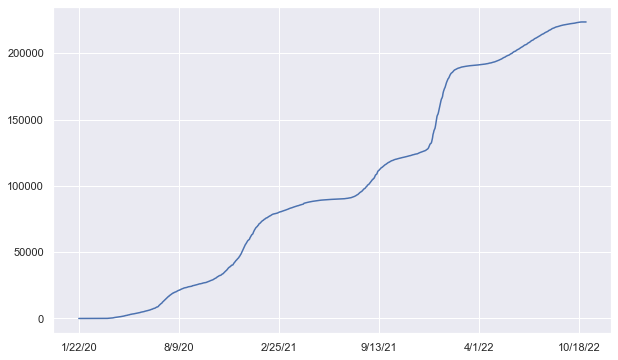

In [35]:
davidson_series.plot()

## Checking if time series is continuous

In [36]:
davidson_series.index = pd.to_datetime(davidson_series.index)
davidson_series1 = davidson_series.asfreq('d')
check = pd.Series(davidson_series1[davidson_series1.isnull()].index)
check

Series([], dtype: datetime64[ns])

### No gaps observed. Series is continuous.

In [37]:
davidson_df = pd.DataFrame(davidson_series).reset_index()
davidson_df.columns = ["date", "cases"]
davidson_df["date"] = pd.to_datetime(davidson_df["date"])
davidson_df.head()

date  cases
0 2020-01-22      0
1 2020-01-23      0
2 2020-01-24      0
3 2020-01-25      0
4 2020-01-26      0

## Loading mask usage by county data by NY Times

In [40]:
mask_use_by_county = pd.read_csv(r"data/mask-use-by-county.csv")

#subset data for Davidson County in Tennessee State
mask_use_by_county = mask_use_by_county[mask_use_by_county['COUNTYFP']==47037]
mask_use_by_county

COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
2446     47037   0.02   0.037      0.086       0.181   0.677

In [41]:
mask_use_by_county.columns

Index(['COUNTYFP', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'], dtype='object')

### Let's talk about bias in surveys:
### 67.7% of people's response was Always when asked “How often do you wear a mask in public when you expect to be within six feet of another person?”. This is generally a positive response since more than 50% people asked did reply a "yes". But it is important to consider survey bias. We are unaware of the sampling measure taken for the survey. Also the person asked the question may feel obligated to say yes but in reality may not always adhere to wearing a mask in public due to discomfort or other reasons.

In [42]:
mask_use_by_county[['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']].sum(axis=1)

2446    1.001
dtype: float64

## Loading mask mandates data by CDC

In [44]:
mask_mandates = pd.read_csv(r"data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
mask_mandates.head(2)

State_Tribe_Territory     County_Name  FIPS_State  FIPS_County       date  \
0                    AL  Autauga County           1            1  4/10/2020   
1                    AL  Autauga County           1            1  4/11/2020   

   order_code Face_Masks_Required_in_Public Source_of_Action  URL Citation  
0           2                           NaN              NaN  NaN      NaN  
1           2                           NaN              NaN  NaN      NaN

In [45]:
#subset data for Davidson County in Tennessee State
mask_mandates_davidson = mask_mandates[(mask_mandates["State_Tribe_Territory"] == "TN") & (mask_mandates['County_Name'] == 'Davidson County')]
mask_mandates_davidson.head()


State_Tribe_Territory      County_Name  FIPS_State  FIPS_County  \
650636                    TN  Davidson County          47           37   
650637                    TN  Davidson County          47           37   
650638                    TN  Davidson County          47           37   
650639                    TN  Davidson County          47           37   
650640                    TN  Davidson County          47           37   

             date  order_code Face_Masks_Required_in_Public Source_of_Action  \
650636  4/10/2020           2                           NaN              NaN   
650637  4/11/2020           2                           NaN              NaN   
650638  4/12/2020           2                           NaN              NaN   
650639  4/13/2020           2                           NaN              NaN   
650640  4/14/2020           2                           NaN              NaN   

        URL Citation  
650636  NaN      NaN  
650637  NaN      NaN  
650638  NaN      NaN  
650639  NaN      NaN  
650640  NaN      NaN

In [46]:
mask_mandates_davidson.isna().sum()

State_Tribe_Territory              0
County_Name                        0
FIPS_State                         0
FIPS_County                        0
date                               0
order_code                         0
Face_Masks_Required_in_Public    493
Source_of_Action                 493
URL                              493
Citation                         493
dtype: int64

In [47]:
mask_mandates_davidson.shape

(493, 10)

In [48]:
mask_mandates_davidson.Face_Masks_Required_in_Public.unique()

array([nan], dtype=object)

### All Null Values present in column Face_Masks_Required_in_Public. Therefore no mask mandate data available for Davidson County in Tennessee.

# Research Question: How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 1, 2021?

In [49]:
davidson_df = davidson_df[(davidson_df['date']>=pd.to_datetime("2020-02-01")) & (davidson_df['date']<=pd.to_datetime("2021-10-01"))].reset_index(drop=True)
davidson_df.head()


date  cases
0 2020-02-01      0
1 2020-02-02      0
2 2020-02-03      0
3 2020-02-04      0
4 2020-02-05      0

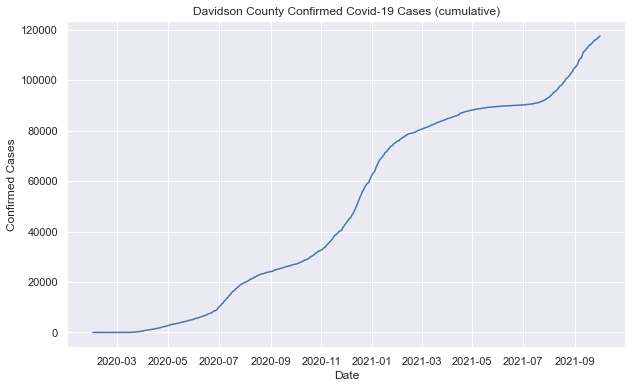

In [50]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'cases')
ax.set(title = 'Davidson County Confirmed Covid-19 Cases (cumulative)', xlabel='Date', ylabel='Confirmed Cases')
plt.show()

### This graph shows a cumulative sum of cases. We need to see how the rise of new cases was in the timeline.

Thank you for this code piece, Charles -

In [51]:
davidson_df['new_cases'] = davidson_df['cases'] - davidson_df.shift(periods=1)['cases']
davidson_df = davidson_df.fillna(0)
davidson_df.head()

date  cases  new_cases
0 2020-02-01      0        0.0
1 2020-02-02      0        0.0
2 2020-02-03      0        0.0
3 2020-02-04      0        0.0
4 2020-02-05      0        0.0

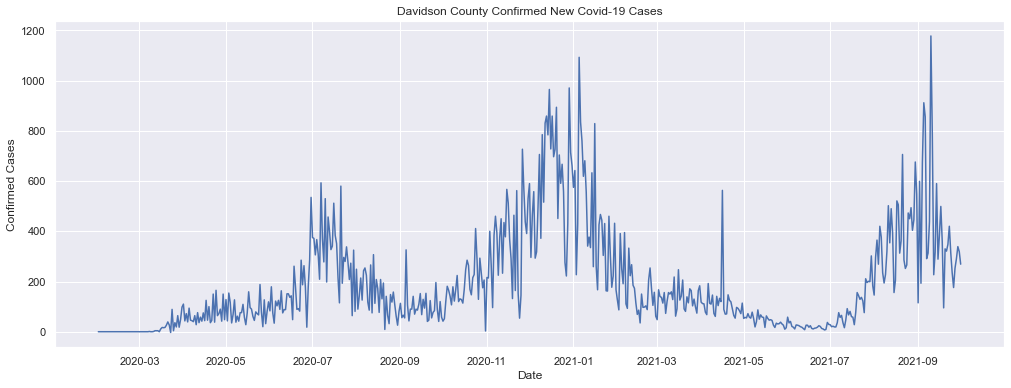

In [52]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'new_cases')
ax.set(title = 'Davidson County Confirmed New Covid-19 Cases', xlabel='Date', ylabel='Confirmed Cases')
plt.show()

### We observe several peaks in the timeline: July, Dec of 2020 and Jan, April, September of 2021.

### Since there was no mask mandate data available in the given dataset for Tennessee State/Davidson County, I did some external research - 

Source: https://www.vumc.org/health-policy/news-events/tennessee-areas-without-mask-requirements-have-higher-death-toll-capita
Published Date: November 10 2020

As per this report on counties in Tennessee, the areas where mask requirements were instituted showed substantially lower death rates due to COVID-19 as compared to areas without mask requirements, according to an analysis by Vanderbilt Department of Health Policy researchers.

The analysis, led by John Graves, PhD, associate professor of Health Policy and director of the Vanderbilt Center for Health Economic Modeling, finds that early adopting counties in Tennessee saw their death rate begin to decline by late July of 2020, while later adopting counties saw declines in August and September. Non-adopting counties continue to see death rates rise, the researchers found.

Additionally, mask requirements were adopted between July 10 2020 and first week of August 2020. Now, the death rate going high means that the case rate was also going high in this case.

We do observe a dip in new cases after July 2020. 

## Marking July 10 2020 for when masking mandate was adopted -

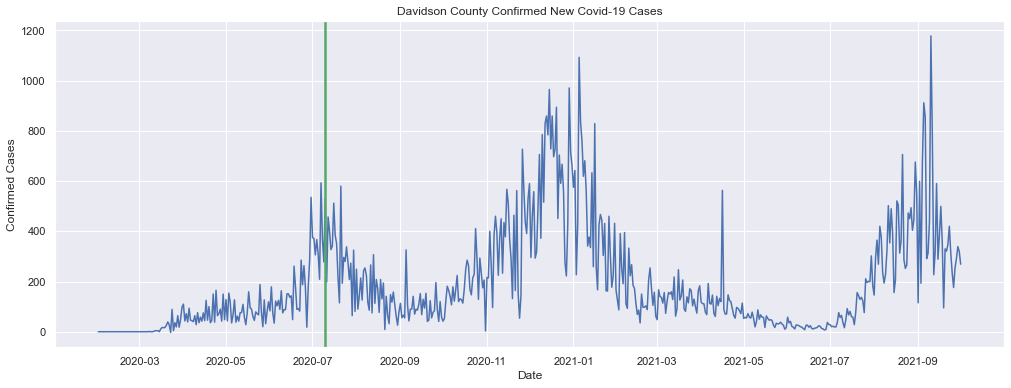

In [53]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'new_cases')
ax.set(title = 'Davidson County Confirmed New Covid-19 Cases', xlabel='Date', ylabel='Confirmed Cases')
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.show()

## Aggregating daily data to weekly data to reduce fluctuations in graph view

In [54]:
#convert date column to datetime and subtract one week
davidson_df['date2'] = pd.to_datetime(davidson_df['date']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
davidson_df_weekly = davidson_df.groupby([pd.Grouper(key='date2', freq='W')])['new_cases'].sum().reset_index()
davidson_df_weekly.head()

date2  new_cases
0 2020-01-26        0.0
1 2020-02-02        0.0
2 2020-02-09        0.0
3 2020-02-16        0.0
4 2020-02-23        0.0

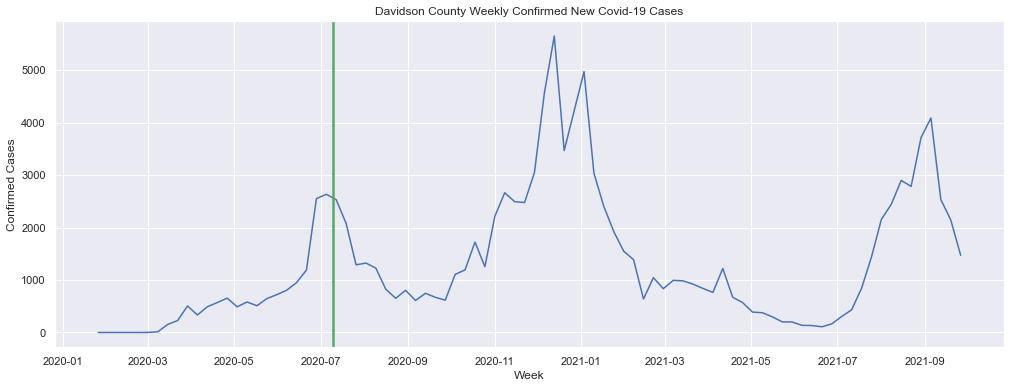

In [55]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df_weekly, x = 'date2', y = 'new_cases')
ax.set(title = 'Davidson County Weekly Confirmed New Covid-19 Cases', xlabel='Week', ylabel='Confirmed Cases')
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.show()

Additionally, as per US News, Tennessee Gov. Bill Lee signed an executive order in April 2021 that removed local authority on mask mandates.

Source: https://www.usnews.com/news/best-states/articles/these-are-the-states-with-mask-mandates#tenn

### Coincidently we observe a short rise in confirmed cases in April 2021 itself

## Marking April 2021 for when masking mandate was officially lifted -

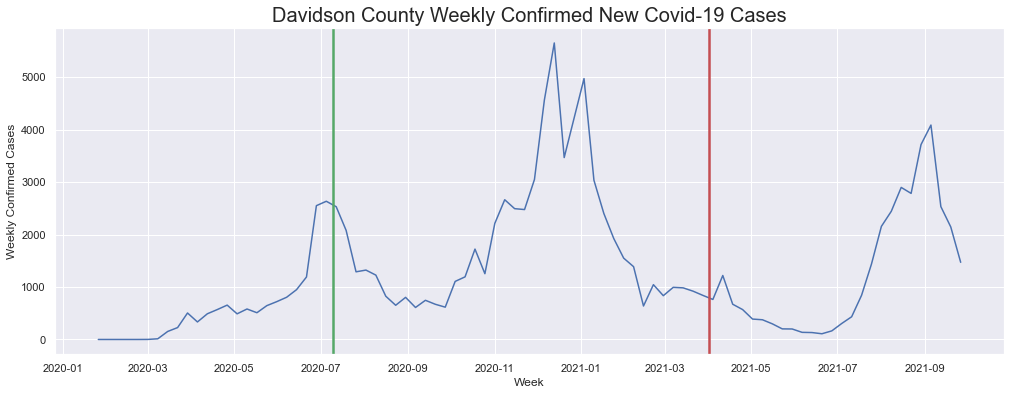

In [56]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df_weekly, x = 'date2', y = 'new_cases')
ax.set(xlabel='Week', ylabel='Weekly Confirmed Cases')
plt.title('Davidson County Weekly Confirmed New Covid-19 Cases', fontsize = 20)
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2.5)
plt.show()

### Even though the mask mandates show relation with rise & fall of confirmed cases, it is not enough to be concluded as a valid direct derivation.

# VISUALIZATIONS:

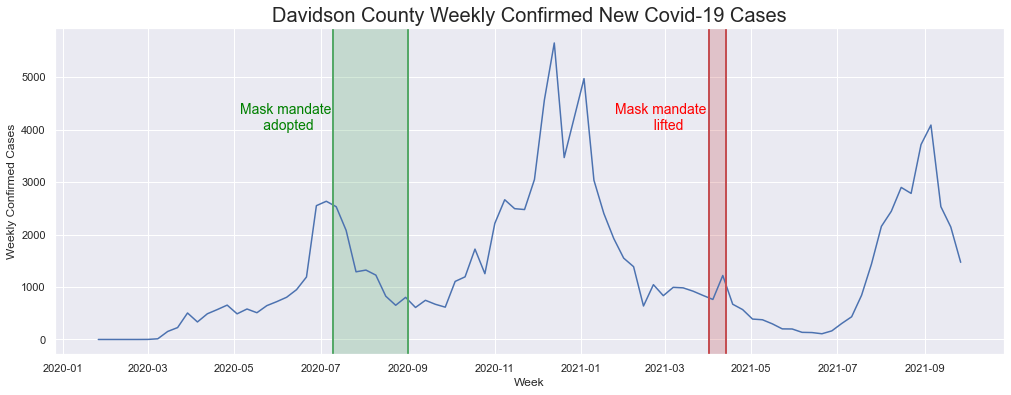

In [57]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df_weekly, x = 'date2', y = 'new_cases')
ax.set(xlabel='Week', ylabel='Weekly Confirmed Cases')
plt.title('Davidson County Weekly Confirmed New Covid-19 Cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-13"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-13"), color='r', alpha=0.25)


plt.text(pd.to_datetime("2020-05-05"), 4000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-01-25"), 4000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')

plt.show()

### We observed a fall in weekly cases when masks were adopted in 2020 and we observed a short rise in April 2021 when mask mandate was officially lifted. We do observe peaks and troughs through the timeline despite having no direct relation with the available mask mandate data. Therefore, we conclude that the masking policies may not always have a direct impact on the progression of Covid-19 new cases. It is also very important to consider that people did not show symptoms right away after infection. It may have taken a few days for the testing results to become available especially during the early period of the pandemic in 2020.

# Derivative function:

Using pct_change to find rate of change of the new cases over time and analysing differences in rates.

This percentage change is calculated between 2 consecutive time periods (Eg. [Week 2 - Week 1]/ Week 1). This shows us the rate of change of infection spread.

In [58]:
davidson_df_weekly['rate_of_change'] = davidson_df_weekly.new_cases.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
davidson_df_weekly.loc[davidson_df_weekly['rate_of_change']==np.inf, 'rate_of_change'] = np.nan
davidson_df_weekly.loc[davidson_df_weekly['rate_of_change']>10, 'rate_of_change'] = np.nan

Text(0.5, 1.0, 'Davidson County Rate of change in confirmed new Covid-19 cases')

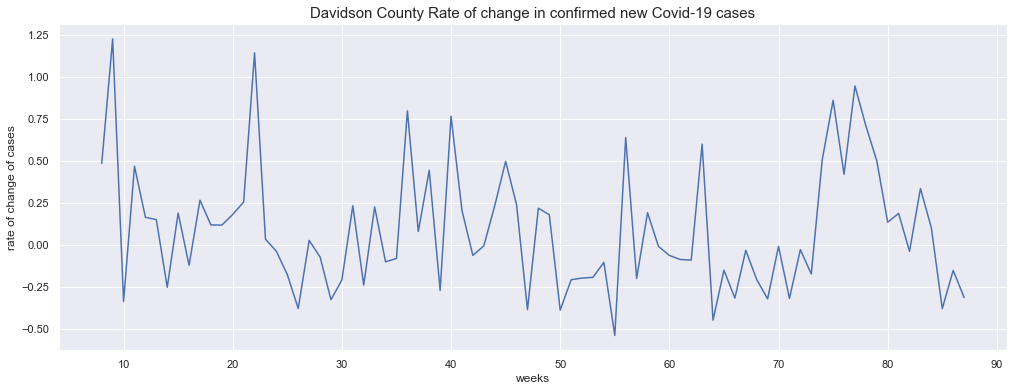

In [59]:
ax = davidson_df_weekly.rate_of_change.plot()
ax.set(xlabel='weeks', ylabel='rate of change of cases')
plt.title('Davidson County Rate of change in confirmed new Covid-19 cases', fontsize = 15)

## Analysing rate of change of infection for the 2 aforementioned timelines
Between July 2020 - Sept 2020 and the month of April in 2021.

In [60]:
davidson_df_weekly['rate_of_change2'] = davidson_df_weekly['rate_of_change'].copy()

davidson_df_weekly['indicator'] = 0
davidson_df_weekly.loc[(davidson_df_weekly['date2']>=pd.to_datetime("2020-07-10")) & \
                       (davidson_df_weekly['date2']<=pd.to_datetime("2020-09-01")), 'indicator'] = 1
davidson_df_weekly.loc[(davidson_df_weekly['date2']>=pd.to_datetime("2021-04-01")) & \
                       (davidson_df_weekly['date2']<=pd.to_datetime("2021-04-13")), 'indicator'] = 1

In [61]:
davidson_df_weekly.loc[davidson_df_weekly['indicator']!=1, 'rate_of_change2'] = np.nan

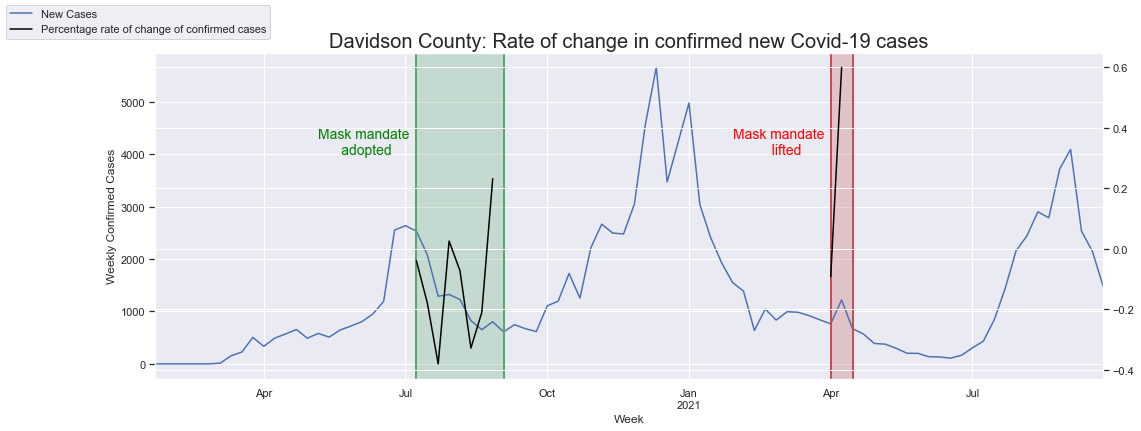

In [62]:
davidson_df_weekly.rename(columns = {'rate_of_change2':'Percentage rate of change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(17,6)})
ax = davidson_df_weekly.plot(x="date2", y="New Cases", legend=False)
ax.set(xlabel='Week', ylabel='Weekly Confirmed Cases')
plt.title('Davidson County: Rate of change in confirmed new Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-13"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-13"), color='r', alpha=0.25)

plt.text(pd.to_datetime("2020-05-05"), 4000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-01-25"), 4000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')


ax2 = ax.twinx()
davidson_df_weekly.plot(x="date2", y="Percentage rate of change of confirmed cases", ax=ax2, legend=False, color="black")

ax.figure.legend(loc = 'upper left')
plt.show()

The rate of change is observed as a zoomed in view using a dual axes plot.
We observe a variability in rate of change of cases in the green phase. Where as we observe a steep rise in rate of change of cases in the red phase.

### The derivative function on weekly data is not giving the desired understanding of percentage change in new cases. There we will go back to using daily data for our final analysis.

# Derivative function applied on daily confirmed cases data - 
Using pct_change to find rate of change of the new cases over time and analysing differences in rates.

This percentage change is calculated between 2 consecutive time periods (Eg. [Week 2 - Week 1]/ Week 1). This shows us the rate of change of infection spread.

In [63]:
davidson_df.head(2)

date  cases  new_cases      date2
0 2020-02-01      0        0.0 2020-01-25
1 2020-02-02      0        0.0 2020-01-26

In [64]:
davidson_df2 = davidson_df.copy()

davidson_df2['rate_of_change'] = davidson_df2.new_cases.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
davidson_df2.loc[davidson_df2['rate_of_change']==np.inf, 'rate_of_change'] = np.nan
#davidson_df2.loc[davidson_df2['rate_of_change']>10, 'rate_of_change'] = np.nan #ignore

davidson_df2['rate_of_change2'] = davidson_df2['rate_of_change'].copy()

#ignore -
# davidson_df2['indicator'] = 0
# davidson_df2.loc[(davidson_df2['date2']>=pd.to_datetime("2020-07-10")) & \
#                        (davidson_df2['date2']<=pd.to_datetime("2020-09-01")), 'indicator'] = 1
# davidson_df2.loc[(davidson_df2['date2']>=pd.to_datetime("2021-04-01")) & \
#                        (davidson_df2['date2']<=pd.to_datetime("2021-04-13")), 'indicator'] = 1

# davidson_df2.loc[davidson_df2['indicator']!=1, 'rate_of_change2'] = np.nan

In [65]:
davidson_df3 = davidson_df2[davidson_df2['date']>=pd.to_datetime("2020-03-06")].reset_index(drop=True)
davidson_df3.head()

date  cases  new_cases      date2  rate_of_change  rate_of_change2
0 2020-03-06      0        0.0 2020-02-28             NaN              NaN
1 2020-03-07      0        0.0 2020-02-29             NaN              NaN
2 2020-03-08      1        1.0 2020-03-01             NaN              NaN
3 2020-03-09      1        0.0 2020-03-02            -1.0             -1.0
4 2020-03-10      1        0.0 2020-03-03             NaN              NaN

# FINAL VISUALIZATION

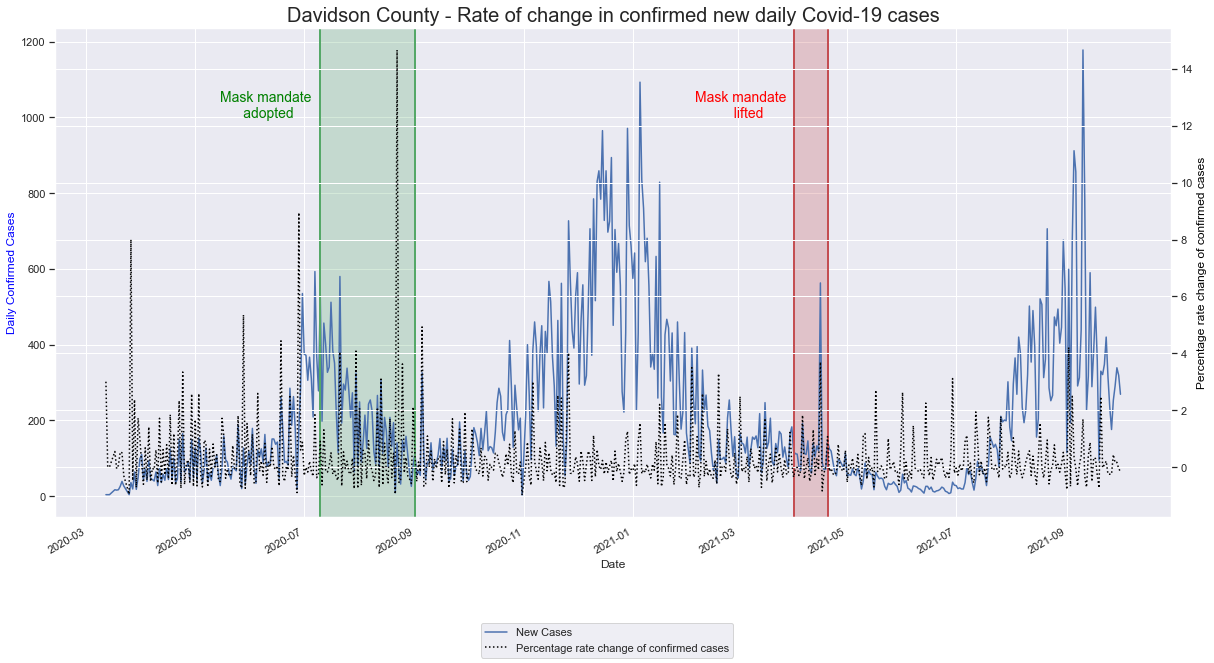

In [287]:
davidson_df3.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = davidson_df3.plot(x="date", y="New Cases", legend=False)
ax.set(xlabel='Date', ylabel='Daily Confirmed Cases')
ax.yaxis.label.set_color('blue')
plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')


ax2 = ax.twinx()
davidson_df3.plot(x="date", y="Percentage rate change of confirmed cases", ax=ax2, legend=False, color="black", linestyle='dotted')
ax2.set(ylabel='Percentage rate change of confirmed cases')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
plt.show()

### Summary

The rate of change in confirmed daily cases is the black dotted line.

Since this is daily data, we observe a lot of variability throughout. However, if you observe the green phase where mask mandate was adopted, you will notice that the rate of change of cases is lower than prior rates until there is a sharp increase of about 14% in new cases. This could perhaps be because of the complacency of people wearing masks while observing the rate of Covid-19 cases going down (established earlier) and then choosing to remove masks owing to the decreased rate of change.

When the Governor officially lifted the Mask mandate in 2021 (Red phase), we again observe a sudden sharp increase in new cases. We can associate this steep rise due to relatively less or no usage of masks.

As mentioned above, we do observe peaks and troughs in both blue and black lines despite having no direct relation with the available mask mandate data. Therefore, we conclude that the masking policies may not always have a direct impact on the progression of Covid-19 new cases. It is also very important to consider that people did not show symptoms right away after infection. It may have taken a few days for the testing results to become available especially during the early period of the pandemic in 2020.

# Part 2

In [129]:
vaccination_data = pd.read_csv(r"data/COVID-19_Vaccinations_in_the_United_States_DavidsonCounty.csv")
vaccination_data.head()

Date   FIPS  MMWR_week     Recip_County Recip_State  \
0  11/30/2022  47037         48  Davidson County          TN   
1  11/23/2022  47037         47  Davidson County          TN   
2  11/16/2022  47037         46  Davidson County          TN   
3  11/09/2022  47037         45  Davidson County          TN   
4  11/02/2022  47037         44  Davidson County          TN   

   Completeness_pct Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  \
0              97.8                  534,140                        76.9   
1              97.8                  533,807                        76.9   
2              97.8                  533,295                        76.8   
3              97.7                  532,531                        76.7   
4              97.7                  531,718                        76.6   

  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  \
0                        528,666                                   81.6   
1                        528,405                                   81.5   
2                        527,994                                   81.5   
3                        527,437                                   81.4   
4                        526,776                                   81.3   

  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  \
0                         508,025                                    85.6   
1                         507,786                                    85.5   
2                         507,421                                    85.5   
3                         506,953                                    85.4   
4                         506,381                                    85.3   

  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  \
0                         477,755                                    86.7   
1                         477,528                                    86.7   
2                         477,193                                    86.6   
3                         476,757                                    86.5   
4                         476,219                                    86.4   

  Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  \
0                          85,796                                    95.0   
1                          85,776                                    95.0   
2                          85,720                                    95.0   
3                          85,661                                    95.0   
4                          85,586                                    95.0   

  Series_Complete_Yes  Series_Complete_Pop_Pct Series_Complete_5Plus  \
0             470,074                     67.7               467,493   
1             469,787                     67.7               467,270   
2             469,400                     67.6               466,956   
3             468,788                     67.5               466,511   
4             468,147                     67.4               465,992   

   Series_Complete_5PlusPop_Pct Series_Complete_5to17  \
0                          72.1                43,773   
1                          72.1                43,720   
2                          72.0                43,661   
3                          72.0                43,548   
4                          71.9                43,430   

   Series_Complete_5to17Pop_Pct Series_Complete_12Plus  \
0                          45.1                449,964   
1                          45.0                449,777   
2                          45.0                449,502   
3                          44.9                449,136   
4                          44.7                448,693   

   Series_Complete_12PlusPop_Pct Series_Complete_18Plus  \
0                           75.8                423,720   
1                           75.7                423,550   
2                        

In [3]:
vaccination_data.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax

In [130]:
vaccination_data['Date'] = pd.to_datetime(vaccination_data['Date'])
vaccination_data = vaccination_data.sort_values(by = ['Date']).reset_index(drop=True)
vaccination_data.head()

Date   FIPS  MMWR_week     Recip_County Recip_State  Completeness_pct  \
0 2020-12-13  47037         51  Davidson County          TN               0.0   
1 2020-12-14  47037         51  Davidson County          TN               0.0   
2 2020-12-15  47037         51  Davidson County          TN               0.0   
3 2020-12-16  47037         51  Davidson County          TN               0.0   
4 2020-12-17  47037         51  Davidson County          TN               0.0   

  Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  \
0                        0                         0.0   
1                        0                         0.0   
2                        0                         0.0   
3                        0                         0.0   
4                        0                         0.0   

  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  \
0                            NaN                                    NaN   
1                            NaN                                    NaN   
2                            NaN                                    NaN   
3                            NaN                                    NaN   
4                            NaN                                    NaN   

  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  \
0                               0                                     0.0   
1                               0                                     0.0   
2                               0                                     0.0   
3                               0                                     0.0   
4                               0                                     0.0   

  Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  \
0                               0                                     0.0   
1                               0                                     0.0   
2                               0                                     0.0   
3                               0                                     0.0   
4                               0                                     0.0   

  Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  \
0                               0                                     0.0   
1                               0                                     0.0   
2                               0                                     0.0   
3                               0                                     0.0   
4                               0                                     0.0   

  Series_Complete_Yes  Series_Complete_Pop_Pct Series_Complete_5Plus  \
0                   0                      0.0                   NaN   
1                   0                      0.0                   NaN   
2                   0                      0.0                   NaN   
3                   0                      0.0                   NaN   
4                   0                      0.0                   NaN   

   Series_Complete_5PlusPop_Pct Series_Complete_5to17  \
0                           NaN                   NaN   
1                           NaN                   NaN   
2                           NaN                   NaN   
3                           NaN                   NaN   
4                           NaN                   NaN   

   Series_Complete_5to17Pop_Pct Series_Complete_12Plus  \
0                           NaN                      0   
1                           NaN                      0   
2                           NaN                      0   
3                           NaN                      0   
4                           NaN                      0   

   Series_Complete_12PlusPop_Pct Series_Complete_18Plus  \
0                            0.0                      0   
1                            0.0                      0   
2                            0

In [213]:
vaccination_data.tail()

Date   FIPS  MMWR_week     Recip_County Recip_State  \
570 2022-11-02  47037         44  Davidson County          TN   
571 2022-11-09  47037         45  Davidson County          TN   
572 2022-11-16  47037         46  Davidson County          TN   
573 2022-11-23  47037         47  Davidson County          TN   
574 2022-11-30  47037         48  Davidson County          TN   

     Completeness_pct Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  \
570              97.7                  531,718                        76.6   
571              97.7                  532,531                        76.7   
572              97.8                  533,295                        76.8   
573              97.8                  533,807                        76.9   
574              97.8                  534,140                        76.9   

    Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  \
570                        526,776                                   81.3   
571                        527,437                                   81.4   
572                        527,994                                   81.5   
573                        528,405                                   81.5   
574                        528,666                                   81.6   

    Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  \
570                         506,381                                    85.3   
571                         506,953                                    85.4   
572                         507,421                                    85.5   
573                         507,786                                    85.5   
574                         508,025                                    85.6   

     Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  \
570                         476219.0                                    86.4   
571                         476757.0                                    86.5   
572                         477193.0                                    86.6   
573                         477528.0                                    86.7   
574                         477755.0                                    86.7   

    Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  \
570                          85,586                                    95.0   
571                          85,661                                    95.0   
572                          85,720                                    95.0   
573                          85,776                                    95.0   
574                          85,796                                    95.0   

    Series_Complete_Yes  Series_Complete_Pop_Pct Series_Complete_5Plus  \
570             468,147                     67.4               465,992   
571             468,788                     67.5               466,511   
572             469,400                     67.6               466,956   
573             469,787                     67.7               467,270   
574             470,074                     67.7               467,493   

     Series_Complete_5PlusPop_Pct Series_Complete_5to17  \
570                          71.9                43,430   
571                          72.0                43,548   
572                          72.0                43,661   
573                          72.1                43,720   
574                          72.1                43,773   

     Series_Complete_5to17Pop_Pct Series_Complete_12Plus  \
570                          44.7                448,693   
571                          44.9                449,136   
572                          45.0                449,502   
573                          45.0                449,777   
574                          45.1                449,964   

     Series_Complete_12PlusPop_Pct Series_Complete_18Plus  \
570                           75.6

In [132]:
vaccination_data['Administered_Dose1_Recip_18Plus'] = vaccination_data['Administered_Dose1_Recip_18Plus'].str.replace(',','').astype(float)

<AxesSubplot:xlabel='Date', ylabel='Administered_Dose1_Recip_18Plus'>

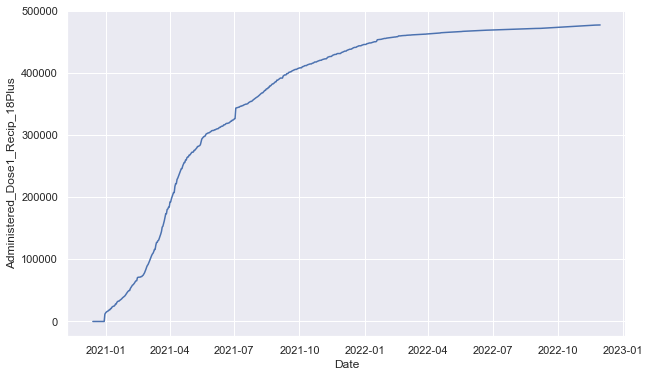

In [133]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = vaccination_data, x = 'Date', y = 'Administered_Dose1_Recip_18Plus')

In [134]:
vaccination_data['New_vaccination_dose1'] = vaccination_data['Administered_Dose1_Recip_18Plus'] - vaccination_data.shift(periods=1)['Administered_Dose1_Recip_18Plus']
vaccination_data = vaccination_data.fillna(0)
vaccination_data.head()

Date   FIPS  MMWR_week     Recip_County Recip_State  Completeness_pct  \
0 2020-12-13  47037         51  Davidson County          TN               0.0   
1 2020-12-14  47037         51  Davidson County          TN               0.0   
2 2020-12-15  47037         51  Davidson County          TN               0.0   
3 2020-12-16  47037         51  Davidson County          TN               0.0   
4 2020-12-17  47037         51  Davidson County          TN               0.0   

  Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  \
0                        0                         0.0   
1                        0                         0.0   
2                        0                         0.0   
3                        0                         0.0   
4                        0                         0.0   

  Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  \
0                              0                                    0.0   
1                              0                                    0.0   
2                              0                                    0.0   
3                              0                                    0.0   
4                              0                                    0.0   

  Administered_Dose1_Recip_12Plus  Administered_Dose1_Recip_12PlusPop_Pct  \
0                               0                                     0.0   
1                               0                                     0.0   
2                               0                                     0.0   
3                               0                                     0.0   
4                               0                                     0.0   

   Administered_Dose1_Recip_18Plus  Administered_Dose1_Recip_18PlusPop_Pct  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   
3                              0.0                                     0.0   
4                              0.0                                     0.0   

  Administered_Dose1_Recip_65Plus  Administered_Dose1_Recip_65PlusPop_Pct  \
0                               0                                     0.0   
1                               0                                     0.0   
2                               0                                     0.0   
3                               0                                     0.0   
4                               0                                     0.0   

  Series_Complete_Yes  Series_Complete_Pop_Pct Series_Complete_5Plus  \
0                   0                      0.0                     0   
1                   0                      0.0                     0   
2                   0                      0.0                     0   
3                   0                      0.0                     0   
4                   0                      0.0                     0   

   Series_Complete_5PlusPop_Pct Series_Complete_5to17  \
0                           0.0                     0   
1                           0.0                     0   
2                           0.0                     0   
3                           0.0                     0   
4                           0.0                     0   

   Series_Complete_5to17Pop_Pct Series_Complete_12Plus  \
0                           0.0                      0   
1                           0.0                      0   
2                           0.0                      0   
3                           0.0                      0   
4                           0.0                      0   

   Series_Complete_12PlusPop_Pct Series_Complete_18Plus  \
0                            0.0                      0   
1                            0.0                      0   
2                       

<AxesSubplot:xlabel='Date', ylabel='New_vaccination_dose1'>

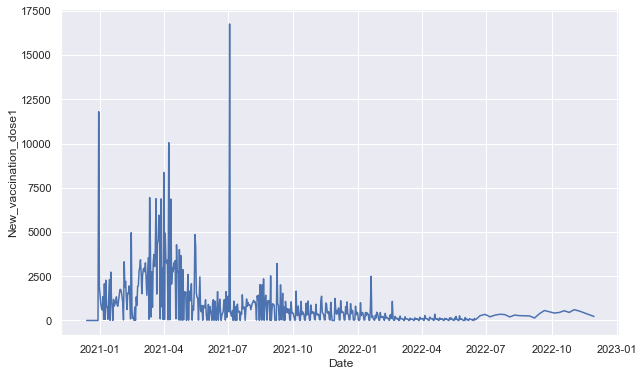

In [135]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = vaccination_data, x = 'Date', y = 'New_vaccination_dose1')

In [140]:
vaccination_data['vaccination_rate_of_change'] = vaccination_data.New_vaccination_dose1.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
vaccination_data.loc[vaccination_data['vaccination_rate_of_change']==np.inf, 'vaccination_rate_of_change'] = np.nan
# davidson_df_weekly.loc[davidson_df_weekly['rate_of_change']>10, 'rate_of_change'] = np.nan

In [141]:
vaccination_data

Date   FIPS  MMWR_week     Recip_County Recip_State  \
0   2020-12-13  47037         51  Davidson County          TN   
1   2020-12-14  47037         51  Davidson County          TN   
2   2020-12-15  47037         51  Davidson County          TN   
3   2020-12-16  47037         51  Davidson County          TN   
4   2020-12-17  47037         51  Davidson County          TN   
5   2020-12-18  47037         51  Davidson County          TN   
6   2020-12-19  47037         51  Davidson County          TN   
7   2020-12-20  47037         52  Davidson County          TN   
8   2020-12-21  47037         52  Davidson County          TN   
9   2020-12-22  47037         52  Davidson County          TN   
10  2020-12-23  47037         52  Davidson County          TN   
11  2020-12-24  47037         52  Davidson County          TN   
12  2020-12-25  47037         52  Davidson County          TN   
13  2020-12-26  47037         52  Davidson County          TN   
14  2020-12-27  47037         53  Davidson County          TN   
15  2020-12-28  47037         53  Davidson County          TN   
16  2020-12-29  47037         53  Davidson County          TN   
17  2020-12-30  47037         53  Davidson County          TN   
18  2020-12-31  47037         53  Davidson County          TN   
19  2021-01-01  47037         53  Davidson County          TN   
20  2021-01-02  47037         53  Davidson County          TN   
21  2021-01-03  47037          1  Davidson County          TN   
22  2021-01-04  47037          1  Davidson County          TN   
23  2021-01-05  47037          1  Davidson County          TN   
24  2021-01-06  47037          1  Davidson County          TN   
25  2021-01-07  47037          1  Davidson County          TN   
26  2021-01-08  47037          1  Davidson County          TN   
27  2021-01-09  47037          1  Davidson County          TN   
28  2021-01-10  47037          2  Davidson County          TN   
29  2021-01-11  47037          2  Davidson County          TN   
30  2021-01-12  47037          2  Davidson County          TN   
31  2021-01-13  47037          2  Davidson County          TN   
32  2021-01-14  47037          2  Davidson County          TN   
33  2021-01-15  47037          2  Davidson County          TN   
34  2021-01-16  47037          2  Davidson County          TN   
35  2021-01-17  47037          3  Davidson County          TN   
36  2021-01-18  47037          3  Davidson County          TN   
37  2021-01-19  47037          3  Davidson County          TN   
38  2021-01-20  47037          3  Davidson County          TN   
39  2021-01-21  47037          3  Davidson County          TN   
40  2021-01-22  47037          3  Davidson County          TN   
41  2021-01-23  47037          3  Davidson County          TN   
42  2021-01-24  47037          4  Davidson County          TN   
43  2021-01-25  47037          4  Davidson County          TN   
44  2021-01-26  47037          4  Davidson County          TN   
45  2021-01-27  47037          4  Davidson County          TN   
46  2021-01-28  47037          4  Davidson County          TN   
47  2021-01-29  47037          4  Davidson County          TN   
48  2021-01-30  47037          4  Davidson County          TN   
49  2021-01-31  47037          5  Davidson County          TN   
50  2021-02-01  47037          5  Davidson County          TN   
51  2021-02-02  47037          5  Davidson County          TN   
52  2021-02-03  47037          5  Davidson County          TN   
53  2021-02-04  47037          5  Davidson County          TN   
54  2021-02-05  47037          5  Davidson County          TN   
55  2021-02-06  47037          5  Davidson County          TN   
56  2021-02-07  47037          6  Davidson County          TN   
57  2021-02-08  47037          6  Davidson County          TN   
58  2021-02-09  47037          6  Davidson County          TN   
59  2021-02-10  47037          6  Davidson County          TN   
60  2021-02-11  47037          6  Davidson Co

<AxesSubplot:xlabel='Date', ylabel='vaccination_rate_of_change'>

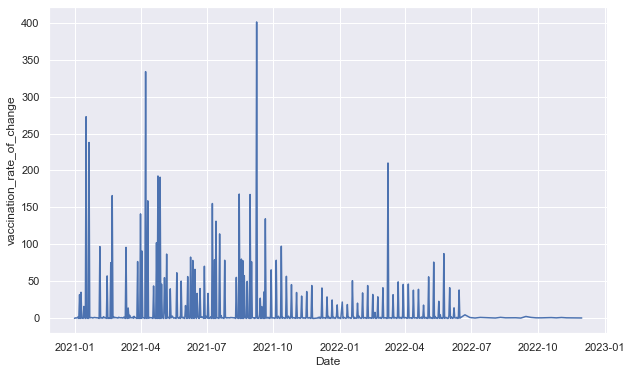

In [142]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = vaccination_data, x = 'Date', y = 'vaccination_rate_of_change')

In [158]:
vaccination_monthly_data = vaccination_data[['Date','Administered_Dose1_Recip_18Plus']].set_index('Date').resample('MS').sum()
vaccination_monthly_data

Administered_Dose1_Recip_18Plus
Date                                       
2020-12-01                          25505.0
2021-01-01                         930063.0
2021-02-01                        1896700.0
2021-03-01                        4223549.0
2021-04-01                        7107230.0
2021-05-01                        9010095.0
2021-06-01                        9478266.0
2021-07-01                       10820966.0
2021-08-01                       11617832.0
2021-09-01                       11993455.0
2021-10-01                       12857686.0
2021-11-01                       12827303.0
2021-12-01                       13651352.0
2022-01-01                       13994661.0
2022-02-01                       12848222.0
2022-03-01                       14328718.0
2022-04-01                       13943115.0
2022-05-01                       14480387.0
2022-06-01                        8437309.0
2022-07-01                        1881397.0
2022-08-01                        2358079.0
2022-09-01                        1891936.0
2022-10-01                        1899519.0
2022-11-01                        2385452.0

In [215]:
vaccination_monthly_data.tail()

Administered_Dose1_Recip_18Plus
Date                                       
2022-07-01                        1881397.0
2022-08-01                        2358079.0
2022-09-01                        1891936.0
2022-10-01                        1899519.0
2022-11-01                        2385452.0

In [4]:
unemployment_data = pd.read_csv(r"data/unemployment_rate_DavidsonCounty.csv")
unemployment_data.head()
#monthly data

DATE  TNDAVI5URN
0  2019-05-01         2.4
1  2019-06-01         2.9
2  2019-07-01         2.8
3  2019-08-01         2.5
4  2019-09-01         2.4

In [12]:
unemployment_data.isna().sum()

DATE          0
TNDAVI5URN    0
dtype: int64

In [10]:
unemployment_data.dtypes

DATE           object
TNDAVI5URN    float64
dtype: object

In [11]:
unemployment_data["DATE"] = pd.to_datetime(unemployment_data["DATE"])

<AxesSubplot:xlabel='DATE', ylabel='TNDAVI5URN'>

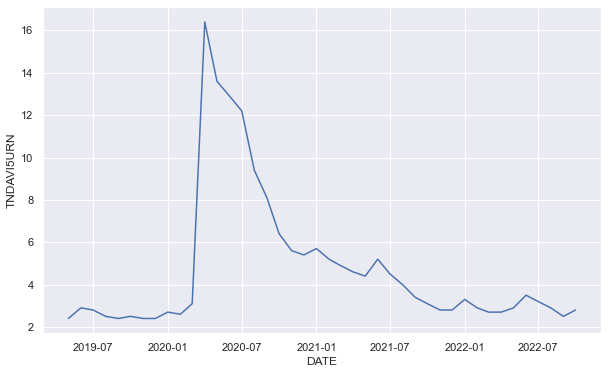

In [15]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = unemployment_data, x = 'DATE', y = 'TNDAVI5URN')

In [16]:
cci_data = pd.read_csv(r"data/consumer_confidence_index_USA.csv")
cci_data.head()

LOCATION INDICATOR   SUBJECT    MEASURE FREQUENCY     TIME     Value  \
0      USA       CCI  AMPLITUD  LTRENDIDX         M  2019-08  100.8929   
1      USA       CCI  AMPLITUD  LTRENDIDX         M  2019-09  100.8929   
2      USA       CCI  AMPLITUD  LTRENDIDX         M  2019-10  101.0988   
3      USA       CCI  AMPLITUD  LTRENDIDX         M  2019-11  101.3715   
4      USA       CCI  AMPLITUD  LTRENDIDX         M  2019-12  101.6026   

   Flag Codes  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

<AxesSubplot:xlabel='TIME', ylabel='Value'>

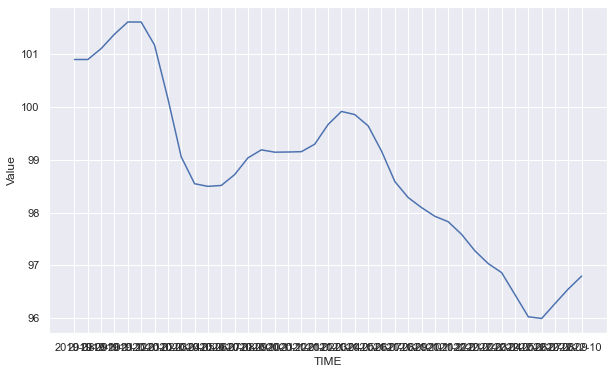

In [17]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = cci_data, x = 'TIME', y = 'Value')

In [24]:
cci_data['TIME'].str[:4].astype(int)

0     2019
1     2019
2     2019
3     2019
4     2019
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
11    2020
12    2020
13    2020
14    2020
15    2020
16    2020
17    2021
18    2021
19    2021
20    2021
21    2021
22    2021
23    2021
24    2021
25    2021
26    2021
27    2021
28    2021
29    2022
30    2022
31    2022
32    2022
33    2022
34    2022
35    2022
36    2022
37    2022
38    2022
Name: TIME, dtype: int64

In [23]:
cci_data['TIME'].str[-2:].astype(int)

0      8
1      9
2     10
3     11
4     12
5      1
6      2
7      3
8      4
9      5
10     6
11     7
12     8
13     9
14    10
15    11
16    12
17     1
18     2
19     3
20     4
21     5
22     6
23     7
24     8
25     9
26    10
27    11
28    12
29     1
30     2
31     3
32     4
33     5
34     6
35     7
36     8
37     9
38    10
Name: TIME, dtype: int64

In [27]:
cci_data['date'] = pd.to_datetime(dict(year=cci_data['TIME'].str[:4].astype(int),
                    month=cci_data['TIME'].str[-2:].astype(int),
                    day = 1))

In [68]:
davidson_df.set_index('date', inplace=True)

In [73]:
davidson_monthly_df = davidson_df.resample('MS').sum().reset_index().drop(columns = ['cases'])
davidson_monthly_df

date  new_cases
0  2020-02-01        0.0
1  2020-03-01      541.0
2  2020-04-01     2082.0
3  2020-05-01     2550.0
4  2020-06-01     4488.0
5  2020-07-01     9927.0
6  2020-08-01     4447.0
7  2020-09-01     2969.0
8  2020-10-01     5459.0
9  2020-11-01    10595.0
10 2020-12-01    18981.0
11 2021-01-01    13781.0
12 2021-02-01     4622.0
13 2021-03-01     4155.0
14 2021-04-01     3534.0
15 2021-05-01     1391.0
16 2021-06-01      636.0
17 2021-07-01     2961.0
18 2021-08-01    11654.0
19 2021-09-01    12460.0
20 2021-10-01      269.0

In [106]:
employment_by_industry_df = pd.read_csv(r"data/Employment by Industry Sector.csv")
employment_by_industry_df
#Data is only available at the state level. Showing data for Tennessee.

Month of Year ID    Month of Year  Supersector ID  \
0            2018-01    January, 2018              15   
1            2018-01    January, 2018              30   
2            2018-01    January, 2018              40   
3            2018-01    January, 2018              50   
4            2018-01    January, 2018              55   
5            2018-01    January, 2018              60   
6            2018-01    January, 2018              65   
7            2018-01    January, 2018              70   
8            2018-01    January, 2018              80   
9            2018-01    January, 2018              90   
10           2018-02   February, 2018              15   
11           2018-02   February, 2018              30   
12           2018-02   February, 2018              40   
13           2018-02   February, 2018              50   
14           2018-02   February, 2018              55   
15           2018-02   February, 2018              60   
16           2018-02   February, 2018              65   
17           2018-02   February, 2018              70   
18           2018-02   February, 2018              80   
19           2018-02   February, 2018              90   
20           2018-03      March, 2018              15   
21           2018-03      March, 2018              30   
22           2018-03      March, 2018              40   
23           2018-03      March, 2018              50   
24           2018-03      March, 2018              55   
25           2018-03      March, 2018              60   
26           2018-03      March, 2018              65   
27           2018-03      March, 2018              70   
28           2018-03      March, 2018              80   
29           2018-03      March, 2018              90   
30           2018-04      April, 2018              15   
31           2018-04      April, 2018              30   
32           2018-04      April, 2018              40   
33           2018-04      April, 2018              50   
34           2018-04      April, 2018              55   
35           2018-04      April, 2018              60   
36           2018-04      April, 2018              65   
37           2018-04      April, 2018              70   
38           2018-04      April, 2018              80   
39           2018-04      April, 2018              90   
40           2018-05        May, 2018              15   
41           2018-05        May, 2018              30   
42           2018-05        May, 2018              40   
43           2018-05        May, 2018              50   
44           2018-05        May, 2018              55   
45           2018-05        May, 2018              60   
46           2018-05        May, 2018              65   
47           2018-05        May, 2018              70   
48           2018-05        May, 2018              80   
49           2018-05        May, 2018              90   
50           2018-06       June, 2018              15   
51           2018-06       June, 2018              30   
52           2018-06       June, 2018              40   
53           2018-06       June, 2018              50   
54           2018-06       June, 2018              55   
55           2018-06       June, 2018              60   
56           2018-06       June, 2018              65   
57           2018-06       June, 2018              70   
58           2018-06       June, 2018              80   
59           2018-06       June, 2018              90   
60           2018-07       July, 2018              15   
61           2018-07       July, 2018              30   
62           2018-07       July, 2018              40   
63           2018-07       July, 2018              50   
64           2018-07       July, 2018              55   
65           2018-07       July, 2018              60   
66           2018-07       July, 2018              65   
67           2018-07       July, 2018              70   
68           2018-07       July, 2018              80   
69           2

In [109]:
employment_by_industry_df['Date'] = pd.to_datetime(employment_by_industry_df.Date)

## Analysis

In [77]:
p2_df = pd.merge(davidson_monthly_df, unemployment_data, left_on = 'date', right_on = 'DATE').rename(columns = {'TNDAVI5URN':'unemployment_rate'})
p2_df.head()

date  new_cases       DATE  unemployment_rate
0 2020-02-01        0.0 2020-02-01                2.6
1 2020-03-01      541.0 2020-03-01                3.1
2 2020-04-01     2082.0 2020-04-01               16.4
3 2020-05-01     2550.0 2020-05-01               13.6
4 2020-06-01     4488.0 2020-06-01               12.9

In [78]:
p2_df.corr()

new_cases  unemployment_rate
new_cases           1.000000          -0.057072
unemployment_rate  -0.057072           1.000000

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = unemployment_data, x = 'DATE', y = 'TNDAVI5URN')

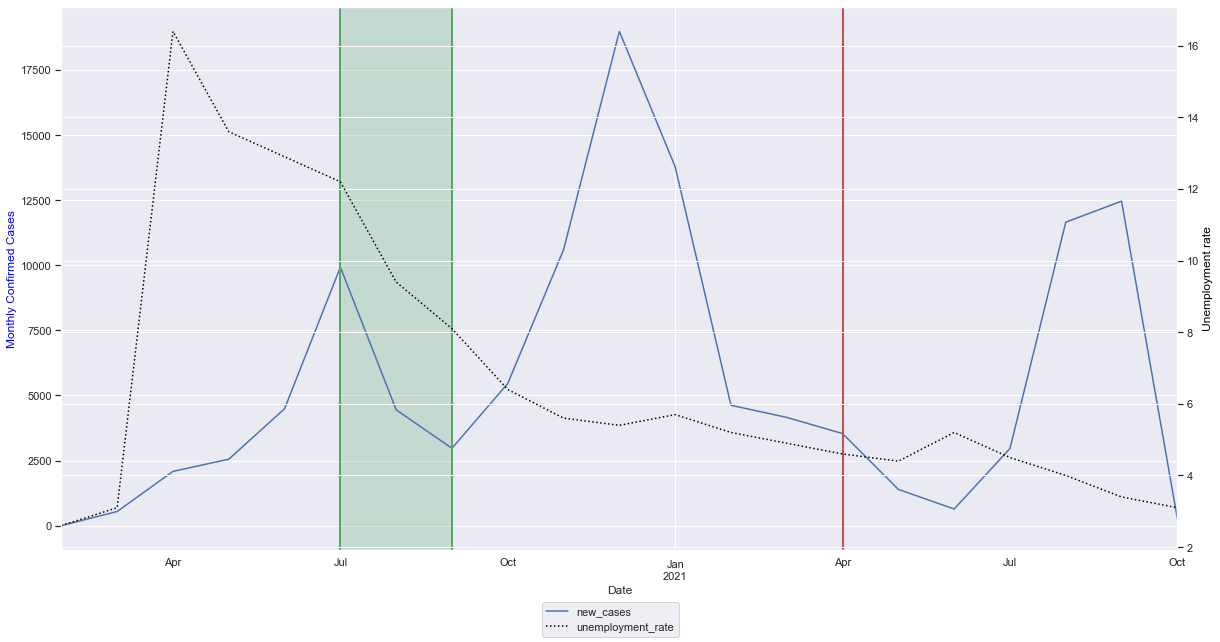

In [79]:
#p2_df.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df.plot(x="date", y="new_cases", legend=False)
ax.set(xlabel='Date', ylabel='Monthly Confirmed Cases')
ax.yaxis.label.set_color('blue')
#plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

# plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
# plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')


ax2 = ax.twinx()
p2_df.plot(x="date", y="unemployment_rate", ax=ax2, legend=False, color="black", linestyle='dotted')
ax2.set(ylabel='Unemployment rate')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
plt.show()

No correlation between unemployment rate and Covid cases

In [81]:
p2_df = pd.merge(p2_df, cci_data[['date','Value']], on = 'date').rename(columns = {'Value':'CCI'})
p2_df.head()

date  new_cases       DATE  unemployment_rate        CCI
0 2020-02-01        0.0 2020-02-01                2.6  101.16660
1 2020-03-01      541.0 2020-03-01                3.1  100.15390
2 2020-04-01     2082.0 2020-04-01               16.4   99.05240
3 2020-05-01     2550.0 2020-05-01               13.6   98.54501
4 2020-06-01     4488.0 2020-06-01               12.9   98.49448

In [82]:
p2_df.corr()

new_cases  unemployment_rate       CCI
new_cases           1.000000          -0.057072 -0.362496
unemployment_rate  -0.057072           1.000000 -0.407124
CCI                -0.362496          -0.407124  1.000000

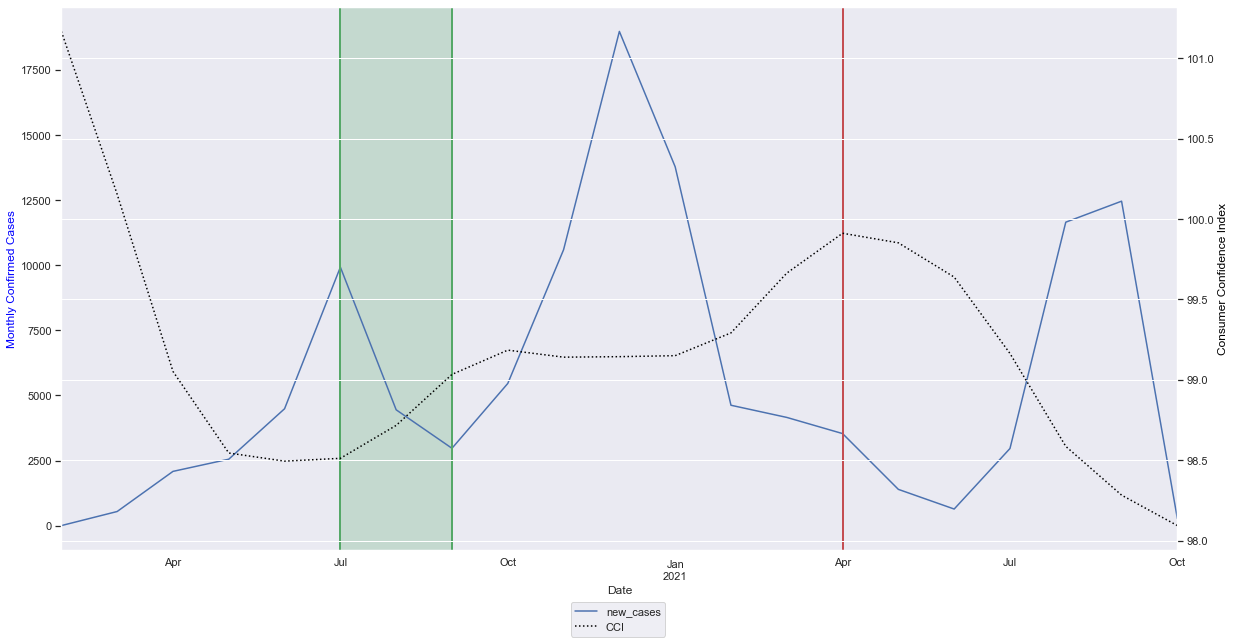

In [86]:
#p2_df.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df.plot(x="date", y="new_cases", legend=False)
ax.set(xlabel='Date', ylabel='Monthly Confirmed Cases')
ax.yaxis.label.set_color('blue')
#plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

# plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
# plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')

ax2 = ax.twinx()
p2_df.plot(x="date", y="CCI", ax=ax2, legend=False, color="black", linestyle='dotted')
ax2.set(ylabel='Consumer Confidence Index')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

Clear Negative correlation between CCI and new cases

In [112]:
p2_df_v2 = p2_df.copy()

In [115]:
p2_df_v2 = pd.merge(p2_df_v2, employment_by_industry_df[['Date','Supersector','NSA Employees Growth']],
                 left_on = 'date', right_on = 'Date')
p2_df_v2.head()

date  new_cases       DATE  unemployment_rate       CCI       Date  \
0 2020-02-01        0.0 2020-02-01                2.6  101.1666 2020-02-01   
1 2020-02-01        0.0 2020-02-01                2.6  101.1666 2020-02-01   
2 2020-02-01        0.0 2020-02-01                2.6  101.1666 2020-02-01   
3 2020-02-01        0.0 2020-02-01                2.6  101.1666 2020-02-01   
4 2020-02-01        0.0 2020-02-01                2.6  101.1666 2020-02-01   

                            Supersector  NSA Employees Growth  
0     Mining, Logging, and Construction              1.919334  
1                         Manufacturing             -0.450826  
2  Trade, Transportation, and Utilities              0.607346  
3                           Information              1.820006  
4                  Financial Activities              1.798931

<AxesSubplot:xlabel='date', ylabel='NSA Employees Growth'>

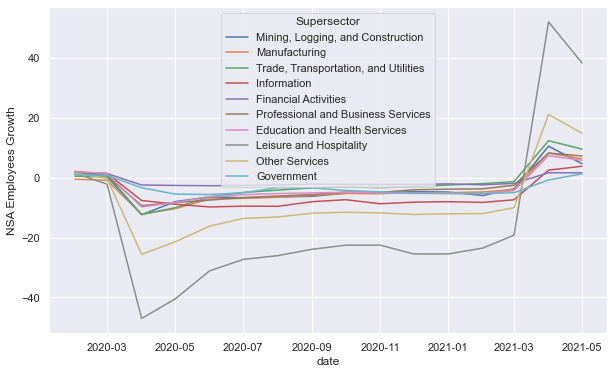

In [116]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data = p2_df_v2, x = 'date', y = 'NSA Employees Growth', hue = 'Supersector')
#monthly growth, year-over-year

In [119]:
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality']

date  new_cases       DATE  unemployment_rate        CCI       Date  \
7   2020-02-01        0.0 2020-02-01                2.6  101.16660 2020-02-01   
17  2020-03-01      541.0 2020-03-01                3.1  100.15390 2020-03-01   
27  2020-04-01     2082.0 2020-04-01               16.4   99.05240 2020-04-01   
37  2020-05-01     2550.0 2020-05-01               13.6   98.54501 2020-05-01   
47  2020-06-01     4488.0 2020-06-01               12.9   98.49448 2020-06-01   
57  2020-07-01     9927.0 2020-07-01               12.2   98.51203 2020-07-01   
67  2020-08-01     4447.0 2020-08-01                9.4   98.71681 2020-08-01   
77  2020-09-01     2969.0 2020-09-01                8.1   99.03383 2020-09-01   
87  2020-10-01     5459.0 2020-10-01                6.4   99.18475 2020-10-01   
97  2020-11-01    10595.0 2020-11-01                5.6   99.14101 2020-11-01   
107 2020-12-01    18981.0 2020-12-01                5.4   99.14413 2020-12-01   
117 2021-01-01    13781.0 2021-01-01                5.7   99.15030 2021-01-01   
127 2021-02-01     4622.0 2021-02-01                5.2   99.29194 2021-02-01   
137 2021-03-01     4155.0 2021-03-01                4.9   99.66364 2021-03-01   
147 2021-04-01     3534.0 2021-04-01                4.6   99.91155 2021-04-01   
157 2021-05-01     1391.0 2021-05-01                4.4   99.85197 2021-05-01   

                 Supersector  NSA Employees Growth  
7    Leisure and Hospitality              1.609813  
17   Leisure and Hospitality             -2.109376  
27   Leisure and Hospitality            -47.024138  
37   Leisure and Hospitality            -40.510336  
47   Leisure and Hospitality            -31.093034  
57   Leisure and Hospitality            -27.284602  
67   Leisure and Hospitality            -26.015518  
77   Leisure and Hospitality            -23.872075  
87   Leisure and Hospitality            -22.515734  
97   Leisure and Hospitality            -22.498872  
107  Leisure and Hospitality            -25.453493  
117  Leisure and Hospitality            -25.439445  
127  Leisure and Hospitality            -23.471015  
137  Leisure and Hospitality            -19.173687  
147  Leisure and Hospitality             52.136224  
157  Leisure and Hospitality             38.429826

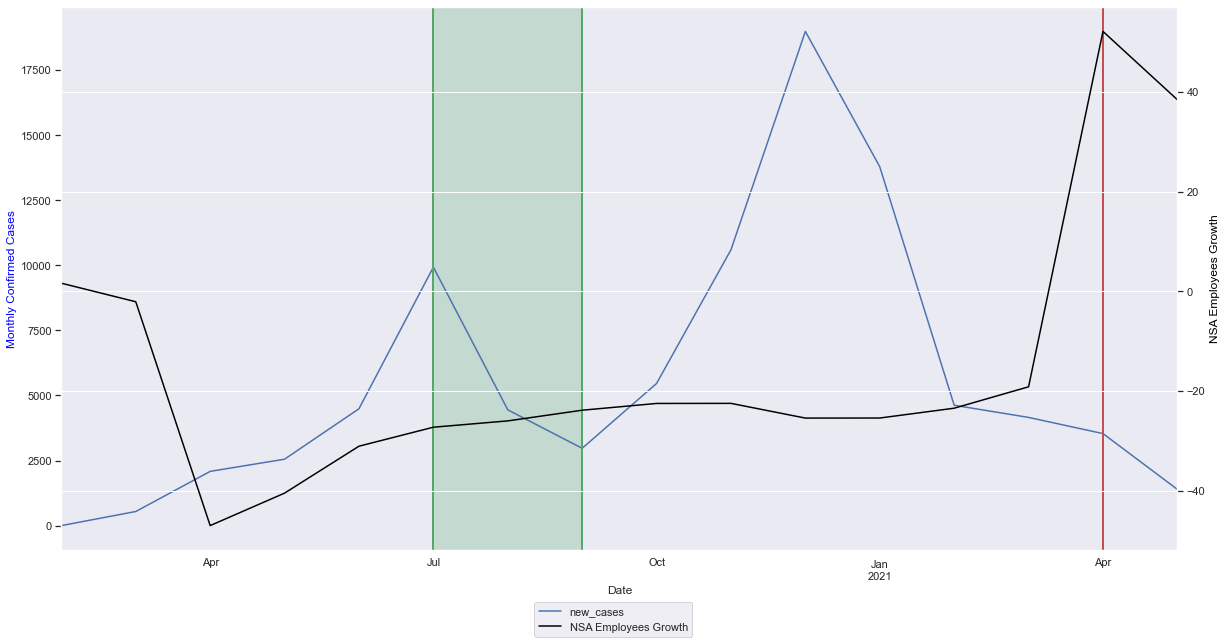

In [121]:
#p2_df.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="new_cases", legend=False)
ax.set(xlabel='Date', ylabel='Monthly Confirmed Cases')
ax.yaxis.label.set_color('blue')
#plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

# plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
# plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')

ax2 = ax.twinx()
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="NSA Employees Growth", ax=ax2, legend=False, color="black")
ax2.set(ylabel='NSA Employees Growth')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

In [122]:
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].corr()

new_cases  unemployment_rate       CCI  \
new_cases              1.000000          -0.052054 -0.382898   
unemployment_rate     -0.052054           1.000000 -0.741846   
CCI                   -0.382898          -0.741846  1.000000   
NSA Employees Growth  -0.280898          -0.617711  0.626868   

                      NSA Employees Growth  
new_cases                        -0.280898  
unemployment_rate                -0.617711  
CCI                               0.626868  
NSA Employees Growth              1.000000

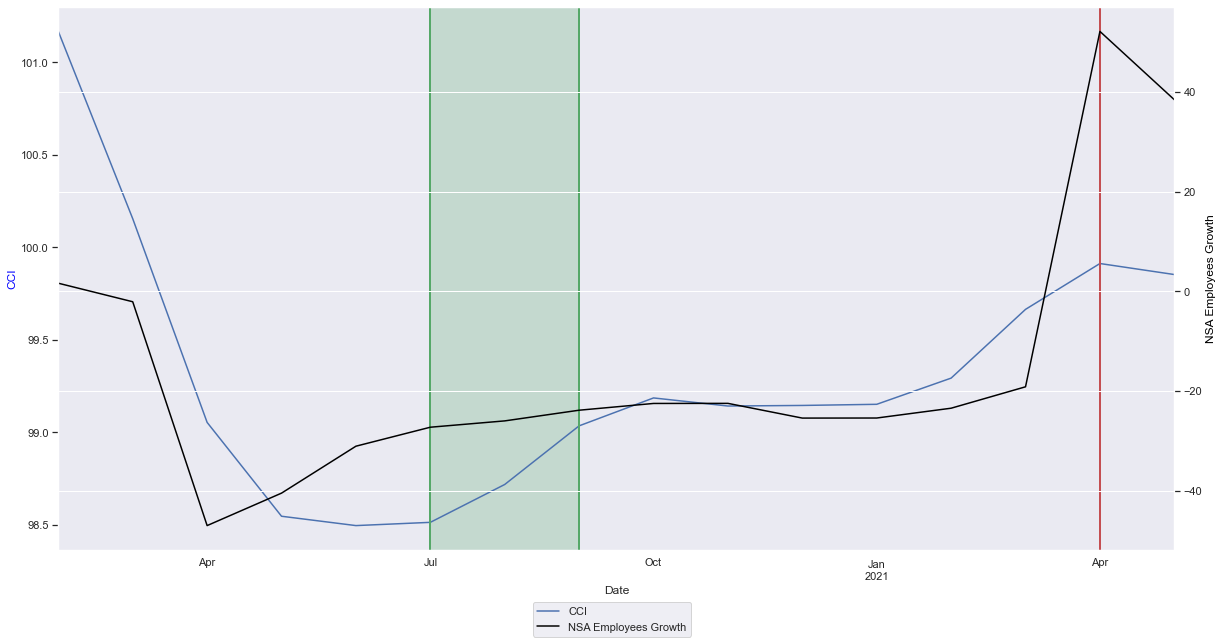

In [123]:
#p2_df.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="CCI", legend=False)
ax.set(xlabel='Date', ylabel='CCI')
ax.yaxis.label.set_color('blue')
#plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

# plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
# plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')

ax2 = ax.twinx()
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].plot(x="date", y="NSA Employees Growth", ax=ax2, legend=False, color="black")
ax2.set(ylabel='NSA Employees Growth')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

In [124]:
p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].corr()

new_cases  unemployment_rate       CCI  \
new_cases              1.000000          -0.052054 -0.382898   
unemployment_rate     -0.052054           1.000000 -0.741846   
CCI                   -0.382898          -0.741846  1.000000   
NSA Employees Growth  -0.280898          -0.617711  0.626868   

                      NSA Employees Growth  
new_cases                        -0.280898  
unemployment_rate                -0.617711  
CCI                               0.626868  
NSA Employees Growth              1.000000

<AxesSubplot:>

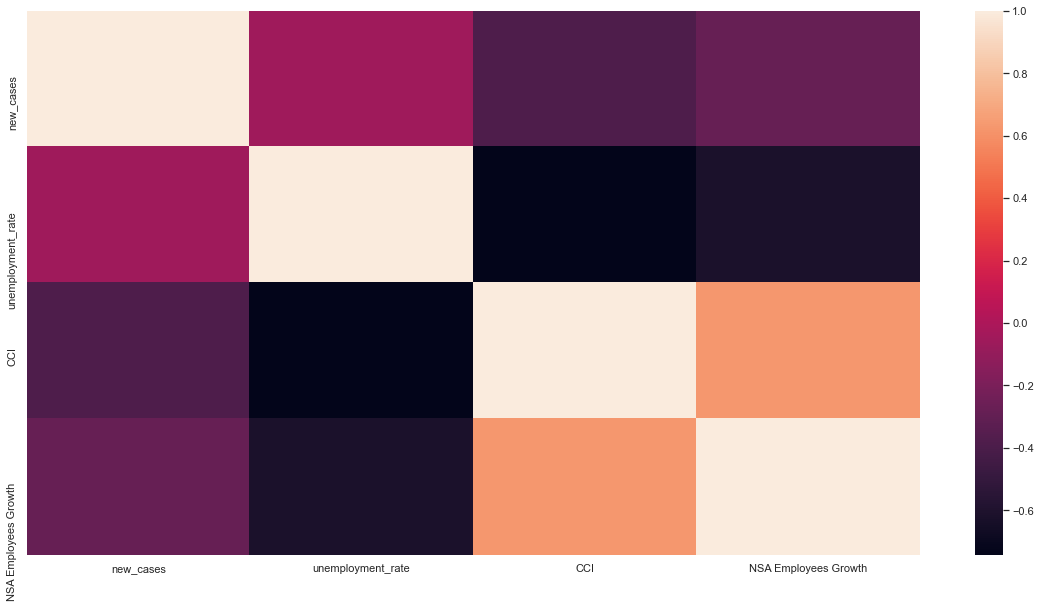

In [125]:
sns.heatmap(p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].corr())

In [153]:
p2_df_v3 = p2_df_v2[p2_df_v2['Supersector']=='Leisure and Hospitality'].reset_index(drop=True)
p2_df_v3

date  new_cases       DATE  unemployment_rate        CCI       Date  \
0  2020-02-01        0.0 2020-02-01                2.6  101.16660 2020-02-01   
1  2020-03-01      541.0 2020-03-01                3.1  100.15390 2020-03-01   
2  2020-04-01     2082.0 2020-04-01               16.4   99.05240 2020-04-01   
3  2020-05-01     2550.0 2020-05-01               13.6   98.54501 2020-05-01   
4  2020-06-01     4488.0 2020-06-01               12.9   98.49448 2020-06-01   
5  2020-07-01     9927.0 2020-07-01               12.2   98.51203 2020-07-01   
6  2020-08-01     4447.0 2020-08-01                9.4   98.71681 2020-08-01   
7  2020-09-01     2969.0 2020-09-01                8.1   99.03383 2020-09-01   
8  2020-10-01     5459.0 2020-10-01                6.4   99.18475 2020-10-01   
9  2020-11-01    10595.0 2020-11-01                5.6   99.14101 2020-11-01   
10 2020-12-01    18981.0 2020-12-01                5.4   99.14413 2020-12-01   
11 2021-01-01    13781.0 2021-01-01                5.7   99.15030 2021-01-01   
12 2021-02-01     4622.0 2021-02-01                5.2   99.29194 2021-02-01   
13 2021-03-01     4155.0 2021-03-01                4.9   99.66364 2021-03-01   
14 2021-04-01     3534.0 2021-04-01                4.6   99.91155 2021-04-01   
15 2021-05-01     1391.0 2021-05-01                4.4   99.85197 2021-05-01   

                Supersector  NSA Employees Growth  
0   Leisure and Hospitality              1.609813  
1   Leisure and Hospitality             -2.109376  
2   Leisure and Hospitality            -47.024138  
3   Leisure and Hospitality            -40.510336  
4   Leisure and Hospitality            -31.093034  
5   Leisure and Hospitality            -27.284602  
6   Leisure and Hospitality            -26.015518  
7   Leisure and Hospitality            -23.872075  
8   Leisure and Hospitality            -22.515734  
9   Leisure and Hospitality            -22.498872  
10  Leisure and Hospitality            -25.453493  
11  Leisure and Hospitality            -25.439445  
12  Leisure and Hospitality            -23.471015  
13  Leisure and Hospitality            -19.173687  
14  Leisure and Hospitality             52.136224  
15  Leisure and Hospitality             38.429826

In [163]:
p2_df_v4 = pd.merge(p2_df_v3,vaccination_monthly_data, left_on = 'date',
                                  right_on = 'Date', how = 'left')
p2_df_v4

date  new_cases       DATE  unemployment_rate        CCI       Date  \
0  2020-02-01        0.0 2020-02-01                2.6  101.16660 2020-02-01   
1  2020-03-01      541.0 2020-03-01                3.1  100.15390 2020-03-01   
2  2020-04-01     2082.0 2020-04-01               16.4   99.05240 2020-04-01   
3  2020-05-01     2550.0 2020-05-01               13.6   98.54501 2020-05-01   
4  2020-06-01     4488.0 2020-06-01               12.9   98.49448 2020-06-01   
5  2020-07-01     9927.0 2020-07-01               12.2   98.51203 2020-07-01   
6  2020-08-01     4447.0 2020-08-01                9.4   98.71681 2020-08-01   
7  2020-09-01     2969.0 2020-09-01                8.1   99.03383 2020-09-01   
8  2020-10-01     5459.0 2020-10-01                6.4   99.18475 2020-10-01   
9  2020-11-01    10595.0 2020-11-01                5.6   99.14101 2020-11-01   
10 2020-12-01    18981.0 2020-12-01                5.4   99.14413 2020-12-01   
11 2021-01-01    13781.0 2021-01-01                5.7   99.15030 2021-01-01   
12 2021-02-01     4622.0 2021-02-01                5.2   99.29194 2021-02-01   
13 2021-03-01     4155.0 2021-03-01                4.9   99.66364 2021-03-01   
14 2021-04-01     3534.0 2021-04-01                4.6   99.91155 2021-04-01   
15 2021-05-01     1391.0 2021-05-01                4.4   99.85197 2021-05-01   

                Supersector  NSA Employees Growth  \
0   Leisure and Hospitality              1.609813   
1   Leisure and Hospitality             -2.109376   
2   Leisure and Hospitality            -47.024138   
3   Leisure and Hospitality            -40.510336   
4   Leisure and Hospitality            -31.093034   
5   Leisure and Hospitality            -27.284602   
6   Leisure and Hospitality            -26.015518   
7   Leisure and Hospitality            -23.872075   
8   Leisure and Hospitality            -22.515734   
9   Leisure and Hospitality            -22.498872   
10  Leisure and Hospitality            -25.453493   
11  Leisure and Hospitality            -25.439445   
12  Leisure and Hospitality            -23.471015   
13  Leisure and Hospitality            -19.173687   
14  Leisure and Hospitality             52.136224   
15  Leisure and Hospitality             38.429826   

    Administered_Dose1_Recip_18Plus  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
5                               NaN  
6                               NaN  
7                               NaN  
8                               NaN  
9                               NaN  
10                          25505.0  
11                         930063.0  
12                        1896700.0  
13                        4223549.0  
14                        7107230.0  
15                        9010095.0

In [ ]:
#p2_df_v4.drop(columns = ['DATE','Date','Supersector'], inplace = True)

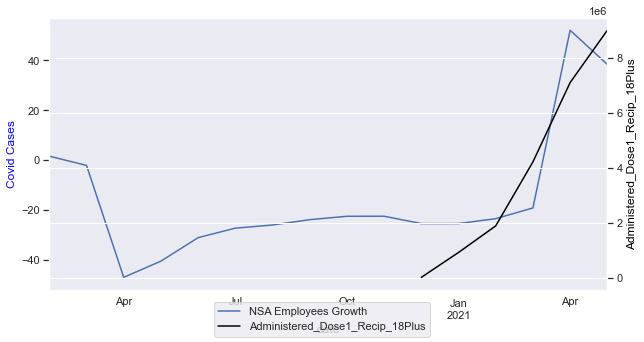

In [177]:
#p2_df.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(10,5)})
ax = p2_df_v4.plot(x="date", y="NSA Employees Growth", legend=False)
ax.set(xlabel='date', ylabel='Covid Cases')
ax.yaxis.label.set_color('blue')
#plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

# plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
# plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')

ax2 = ax.twinx()
p2_df_v4.plot(x="date", y="Administered_Dose1_Recip_18Plus", ax=ax2, legend=False, color="black")
ax2.set(ylabel='Administered_Dose1_Recip_18Plus')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
ax.grid(False)
#ax2.grid(False)
plt.show()

In [212]:
p2_df_v4.corr()

new_cases  unemployment_rate       CCI  \
new_cases                         1.000000          -0.052054 -0.382898   
unemployment_rate                -0.052054           1.000000 -0.741846   
CCI                              -0.382898          -0.741846  1.000000   
NSA Employees Growth             -0.280898          -0.617711  0.626868   
Administered_Dose1_Recip_18Plus  -0.817741          -0.951126  0.956956   

                                 NSA Employees Growth  \
new_cases                                   -0.280898   
unemployment_rate                           -0.617711   
CCI                                          0.626868   
NSA Employees Growth                         1.000000   
Administered_Dose1_Recip_18Plus              0.900964   

                                 Administered_Dose1_Recip_18Plus  
new_cases                                              -0.817741  
unemployment_rate                                      -0.951126  
CCI                                                     0.956956  
NSA Employees Growth                                    0.900964  
Administered_Dose1_Recip_18Plus                         1.000000

In [211]:
p2_df_v4

date  new_cases  unemployment_rate        CCI  NSA Employees Growth  \
0  2020-02-01        0.0                2.6  101.16660              1.609813   
1  2020-03-01      541.0                3.1  100.15390             -2.109376   
2  2020-04-01     2082.0               16.4   99.05240            -47.024138   
3  2020-05-01     2550.0               13.6   98.54501            -40.510336   
4  2020-06-01     4488.0               12.9   98.49448            -31.093034   
5  2020-07-01     9927.0               12.2   98.51203            -27.284602   
6  2020-08-01     4447.0                9.4   98.71681            -26.015518   
7  2020-09-01     2969.0                8.1   99.03383            -23.872075   
8  2020-10-01     5459.0                6.4   99.18475            -22.515734   
9  2020-11-01    10595.0                5.6   99.14101            -22.498872   
10 2020-12-01    18981.0                5.4   99.14413            -25.453493   
11 2021-01-01    13781.0                5.7   99.15030            -25.439445   
12 2021-02-01     4622.0                5.2   99.29194            -23.471015   
13 2021-03-01     4155.0                4.9   99.66364            -19.173687   
14 2021-04-01     3534.0                4.6   99.91155             52.136224   
15 2021-05-01     1391.0                4.4   99.85197             38.429826   

    Administered_Dose1_Recip_18Plus  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
5                               NaN  
6                               NaN  
7                               NaN  
8                               NaN  
9                               NaN  
10                          25505.0  
11                         930063.0  
12                        1896700.0  
13                        4223549.0  
14                        7107230.0  
15                        9010095.0

In [169]:
#p2_df_v4.to_excel(r"result_data.xlsx", index = False)

In [183]:
p2_df_v4.columns

Index(['date', 'new_cases', 'unemployment_rate', 'CCI', 'NSA Employees Growth',
       'Administered_Dose1_Recip_18Plus'],
      dtype='object')

In [178]:
from sklearn import preprocessing
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

In [204]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(p2_df_v4[['new_cases', 'CCI', 'NSA Employees Growth',
       'Administered_Dose1_Recip_18Plus']].values)
p2_df_v5 = pd.DataFrame(x_scaled)
p2_df_v5['date'] = p2_df_v4['date']
p2_df_v5.columns = ['new_cases', 'CCI', 'NSA Employees Growth',
       'Administered_Dose1_Recip_18Plus','date']

In [210]:
p2_df_v5.to_excel(r"result_standardized.xlsx",index=False)

In [206]:
dfm = p2_df_v5.melt('date', var_name='cols', value_name='values')

<AxesSubplot:xlabel='date', ylabel='values'>

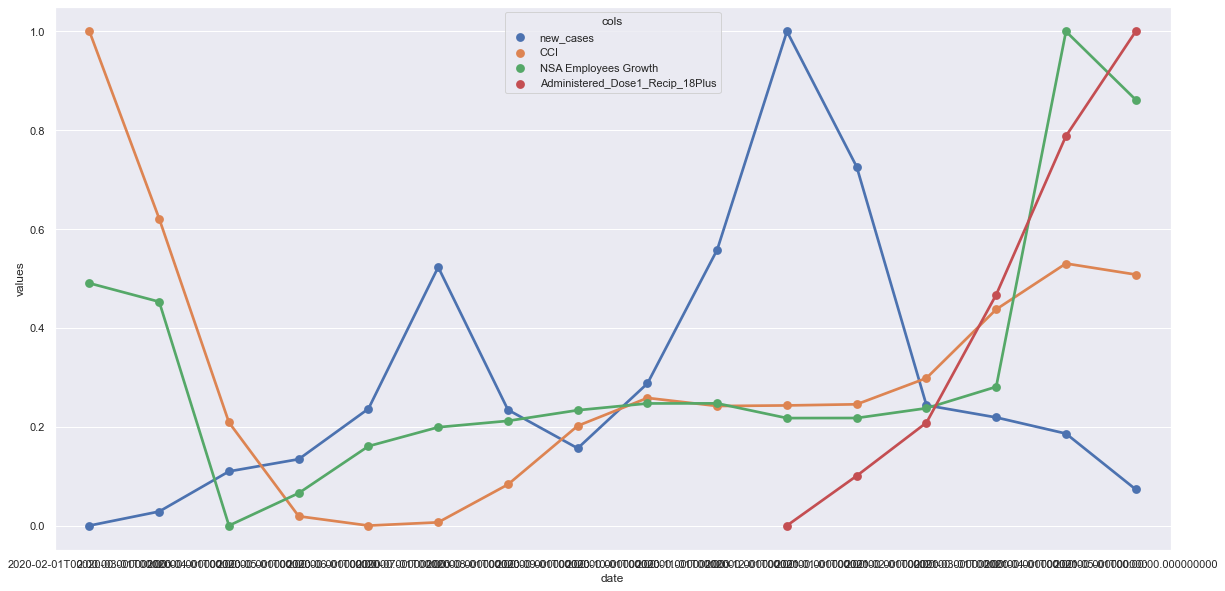

In [207]:
sns.set(rc={'figure.figsize':(20,10)})
sns.pointplot(x="date", y="values", hue='cols', data=dfm)

In [ ]:
sns.pointplot(x="X_Axis", y="vals", hue='cols', data=dfm)